Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

Import data

In [ ]:
new_2015 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2015.csv')
new_2016 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2016.csv')
new_2017 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2017.csv')
new_2018 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2018.csv')
new_2019 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2019.csv')
new_2020 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2020.csv')
new_2021 = pd.read_csv('/content/drive/Shareddrives/DSL 7기 EDA/박지은/df_2021.csv')

연도별 데이터 합치기

In [ ]:
new_concat = pd.concat([new_2015, new_2016, new_2017, new_2018, new_2019, new_2020, new_2021], axis=0, sort = False)
new_concat

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,145,3.5118,0.450848,0.730561,0.006992,0.405455,0.015284,0.102819,1.799821,2021
145,Botswana,Sub-Saharan Africa,146,3.4665,1.099198,0.724478,0.339868,0.538626,0.088468,0.027394,0.648460,2021
146,Rwanda,Sub-Saharan Africa,147,3.4147,0.363624,0.202183,0.406969,0.626681,0.492669,0.227457,1.095149,2021
147,Zimbabwe,Sub-Saharan Africa,148,3.1448,0.456724,0.648552,0.243230,0.358907,0.075471,0.157088,1.204845,2021


# Japan

In [ ]:
japan = new_concat[new_concat['Country'] == "Japan"]
japan

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
45,Japan,Eastern Asia,46,5.9870,1.270740,1.257120,0.991110,0.496150,0.180600,0.107050,1.684350,2015
52,Japan,Eastern Asia,53,5.9210,1.380070,1.060540,0.914910,0.467610,0.189850,0.102240,1.805840,2016
50,Japan,Eastern Asia,51,5.9200,1.416915,1.436338,0.913476,0.505626,0.163761,0.120573,1.363224,2017
53,Japan,Eastern Asia,54,5.9150,1.294000,1.462000,0.988000,0.553000,0.150000,0.079000,1.389000,2018
57,Japan,Eastern Asia,58,5.8860,1.327000,1.419000,1.088000,0.445000,0.140000,0.069000,1.398000,2019
61,Japan,East Asia,62,5.8708,1.266724,1.332339,1.072881,0.495466,0.181440,0.035712,1.486200,2020
55,Japan,East Asia,56,5.9405,1.389140,0.949250,0.838472,0.503763,0.192246,0.019543,2.048071,2021


In [ ]:
# 상관계수 구하기
def get_corr(data):
  f,ax = plt.subplots(figsize=(10,7))
  sns.heatmap(data.corr(), annot=True, cmap='Pastel2', linewidth =".5")

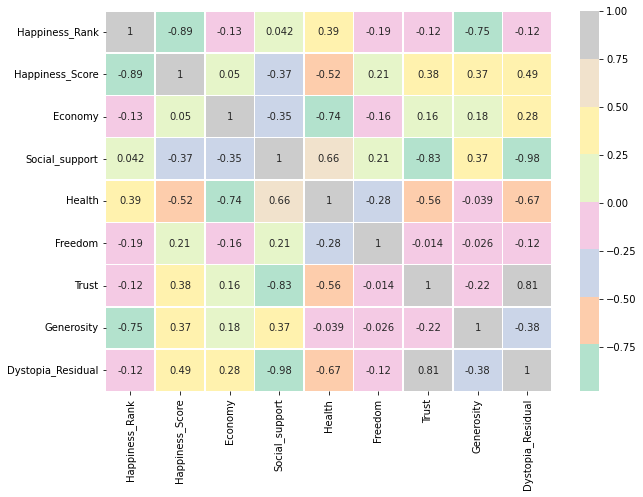

In [ ]:
get_corr(japan.drop('Year', axis=1))

- happiness score가 social support & health와 음의 상관관계를 가짐
- happiness score가 trust & generosity와는 비교적 높은 상관관계를 가짐
- Health와 social support는 서로 강한 상관관계(0.66)를 가짐

Text(0.5, 1.0, "Japan's Happiness Score")

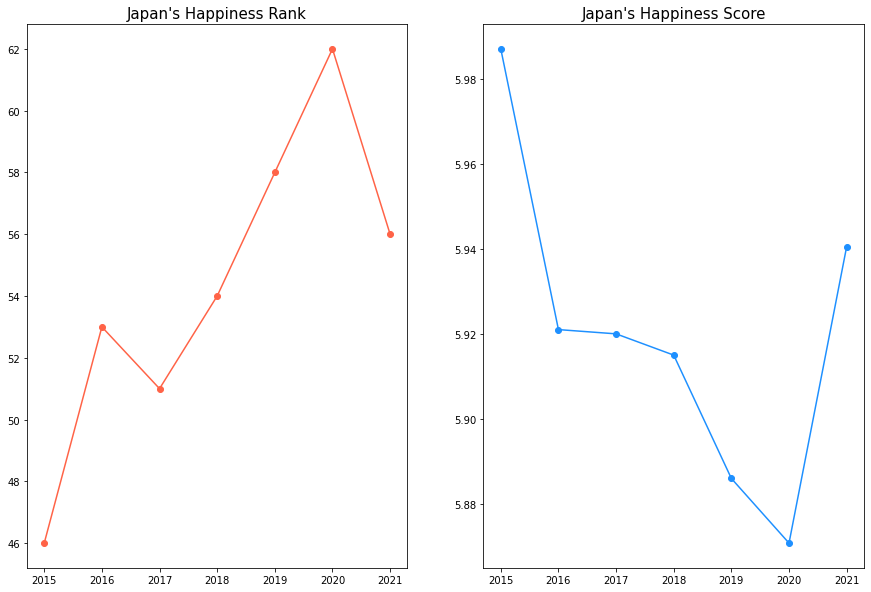

In [ ]:
# 일본의 행복 지수와 순위 변동성
f, axes = plt.subplots(1, 2, figsize=(15,10))

plt.subplot(1, 2, 1)
plt.plot(japan.Year, japan.Happiness_Rank, marker='o', color='tomato')
plt.title("Japan's Happiness Rank", fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(japan.Year, japan.Happiness_Score, marker='o', color='dodgerblue')
plt.title("Japan's Happiness Score", fontsize=15)

In [ ]:
# 일본의 Happiness rank가 46위일 때(2015년)와 62위일 때(2020년) 비교
japan_2015 = japan[japan['Year']==2015]
japan_2020 = japan[japan['Year']==2020]

japan_concat = pd.concat([japan_2015, japan_2020], axis=0, sort = False)
japan_concat

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
45,Japan,Eastern Asia,46,5.9870,1.270740,1.257120,0.991110,0.496150,0.18060,0.107050,1.68435,2015
61,Japan,East Asia,62,5.8708,1.266724,1.332339,1.072881,0.495466,0.18144,0.035712,1.48620,2020


Text(0.5, 1.0, '2015 vs. 2020')

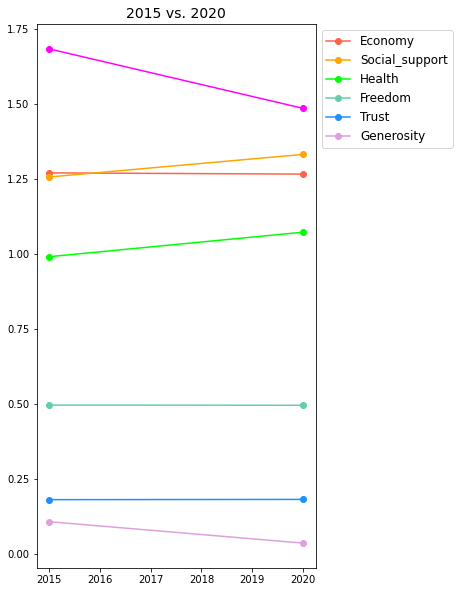

In [ ]:
# 각 feature별 변동성
plt.figure(figsize=(5,10))

plt.plot(japan_concat.Year, japan_concat.Economy, marker='o', color='tomato')
plt.plot(japan_concat.Year, japan_concat.Social_support, marker='o', color='orange')
plt.plot(japan_concat.Year, japan_concat.Health, marker='o', color='lime')
plt.plot(japan_concat.Year, japan_concat.Freedom, marker='o', color='mediumaquamarine')
plt.plot(japan_concat.Year, japan_concat.Trust, marker='o', color='dodgerblue')
plt.plot(japan_concat.Year, japan_concat.Generosity, marker='o', color='plum')
plt.plot(japan_concat.Year, japan_concat.Dystopia_Residual, marker='o', color='magenta')

plt.legend(["Economy", "Social_support", "Health", "Freedom", "Trust", "Generosity"], fontsize=12, bbox_to_anchor = (1,1))  #범례

plt.title('2015 vs. 2020', fontsize=14)

- 2015년: 46위, 2020년: 62위
- Social support & Health 증가, Residual & Generosity 감소 --> Japan의 happiness score가 social support & health와 음의 상관관계를 가지기 때문 or Residual이 감소했기 때문

In [ ]:
new_concat['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', 'East Asia', nan,
       'North America and ANZ', 'Middle East and North Africa',
       'Southeast Asia', 'Commonwealth of Independent States',
       'South Asia'], dtype=object)

In [ ]:
eastern_asia = new_concat.loc[(new_concat['Region']=='Eastern Asia') | (new_concat['Region'] == 'East Asia'),:]
eastern_asia

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
37,Taiwan,Eastern Asia,38,6.2980,1.290980,1.076170,0.875300,0.397400,0.081290,0.253760,2.323230,2015
45,Japan,Eastern Asia,46,5.9870,1.270740,1.257120,0.991110,0.496150,0.180600,0.107050,1.684350,2015
46,South Korea,Eastern Asia,47,5.9840,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780,2015
71,Hong Kong,Eastern Asia,72,5.4740,1.386040,1.058180,1.013280,0.596080,0.371240,0.394780,0.654290,2015
83,China,Eastern Asia,84,5.1400,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400,2015
99,Mongolia,Eastern Asia,100,4.8740,0.828190,1.300600,0.602680,0.436260,0.026660,0.332300,1.347590,2015
34,Taiwan,Eastern Asia,34,6.3790,1.397290,0.926240,0.795650,0.323770,0.066300,0.254950,2.615230,2016
52,Japan,Eastern Asia,53,5.9210,1.380070,1.060540,0.914910,0.467610,0.189850,0.102240,1.805840,2016
57,South Korea,Eastern Asia,57,5.8350,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2.350150,2016
74,Hong Kong,Eastern Asia,75,5.4580,1.510700,0.870210,0.952770,0.480790,0.316470,0.400970,0.926140,2016


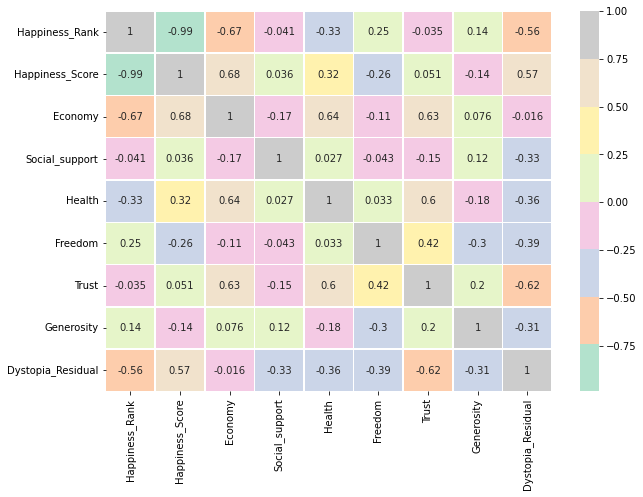

In [ ]:
# eastern asia의 상관계수
get_corr(eastern_asia.drop('Year', axis=1))

- Happiness Score가 Freedom & Generosity와 음의 상관관계를 가짐
- Japan은 happiness score가 social support & health와 음의 상관관계를 가졌음

In [ ]:
eastern_asia['Country'].unique()

array(['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'China', 'Mongolia',
       'Taiwan Province of China', 'Hong Kong S.A.R. of China'],
      dtype=object)

In [ ]:
# 이름 수정 및 Region 추가
new_2017.iloc[32,0]='Taiwan'
new_2017.iloc[32,1]= 33
new_2017.iloc[32,11]='Eastern Asia'
new_2017.iloc[70,0]='Hong Kong'
new_2017.iloc[70,11]='Eastern Asia'

new_2018.iloc[37,0]='Trinidad and Tobago'
new_2018.iloc[37,1]='Latin America and Caribbean'
new_2018.iloc[57,0]='Cyprus'
new_2018.iloc[57,1]='Western Europe'

new_2019.iloc[38,0]='Trinidad and Tobago'
new_2019.iloc[38,1]='Latin America and Caribbean'
new_2019.iloc[63,0]='Cyprus'
new_2019.iloc[63,1]='Western Europe'
new_2019.iloc[83,0]='Macedonia'
new_2019.iloc[83,1]='Central and Eastern Europe'
new_2019.iloc[119,0]='Gambia'
new_2019.iloc[119,1]='Sub-Saharan Africa'

new_2020.iloc[24,0] = 'Taiwan'
new_2020.iloc[77,0] = 'Hong Kong'

new_2021.iloc[23,0] = 'Taiwan'
new_2021.iloc[76,0] = 'Hong Kong'

In [ ]:
# 이름 수정 후 new_concat 새로 정의
new_concat = pd.concat([new_2015, new_2016, new_2017, new_2018, new_2019, new_2020, new_2021], axis=0, sort = False)
new_concat

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,145,3.5118,0.450848,0.730561,0.006992,0.405455,0.015284,0.102819,1.799821,2021
145,Botswana,Sub-Saharan Africa,146,3.4665,1.099198,0.724478,0.339868,0.538626,0.088468,0.027394,0.648460,2021
146,Rwanda,Sub-Saharan Africa,147,3.4147,0.363624,0.202183,0.406969,0.626681,0.492669,0.227457,1.095149,2021
147,Zimbabwe,Sub-Saharan Africa,148,3.1448,0.456724,0.648552,0.243230,0.358907,0.075471,0.157088,1.204845,2021


In [ ]:
eastern_asia = new_concat.loc[(new_concat['Region']=='Eastern Asia') | (new_concat['Region'] == 'East Asia'),:]
eastern_asia

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
37,Taiwan,Eastern Asia,38,6.2980,1.290980,1.076170,0.875300,0.397400,0.081290,0.253760,2.323230,2015
45,Japan,Eastern Asia,46,5.9870,1.270740,1.257120,0.991110,0.496150,0.180600,0.107050,1.684350,2015
46,South Korea,Eastern Asia,47,5.9840,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780,2015
71,Hong Kong,Eastern Asia,72,5.4740,1.386040,1.058180,1.013280,0.596080,0.371240,0.394780,0.654290,2015
83,China,Eastern Asia,84,5.1400,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400,2015
99,Mongolia,Eastern Asia,100,4.8740,0.828190,1.300600,0.602680,0.436260,0.026660,0.332300,1.347590,2015
34,Taiwan,Eastern Asia,34,6.3790,1.397290,0.926240,0.795650,0.323770,0.066300,0.254950,2.615230,2016
52,Japan,Eastern Asia,53,5.9210,1.380070,1.060540,0.914910,0.467610,0.189850,0.102240,1.805840,2016
57,South Korea,Eastern Asia,57,5.8350,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2.350150,2016
74,Hong Kong,Eastern Asia,75,5.4580,1.510700,0.870210,0.952770,0.480790,0.316470,0.400970,0.926140,2016


In [ ]:
eastern_asia['Country'].unique()

array(['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'China', 'Mongolia'],
      dtype=object)

In [ ]:
taiwan = new_concat[new_concat['Country']=="Taiwan"]
korea = new_concat[new_concat['Country']=="South Korea"]
hongkong = new_concat[new_concat['Country']=="Hong Kong"]
china = new_concat[new_concat['Country']=="China"]
mongolia = new_concat[new_concat['Country']=="Mongolia"]

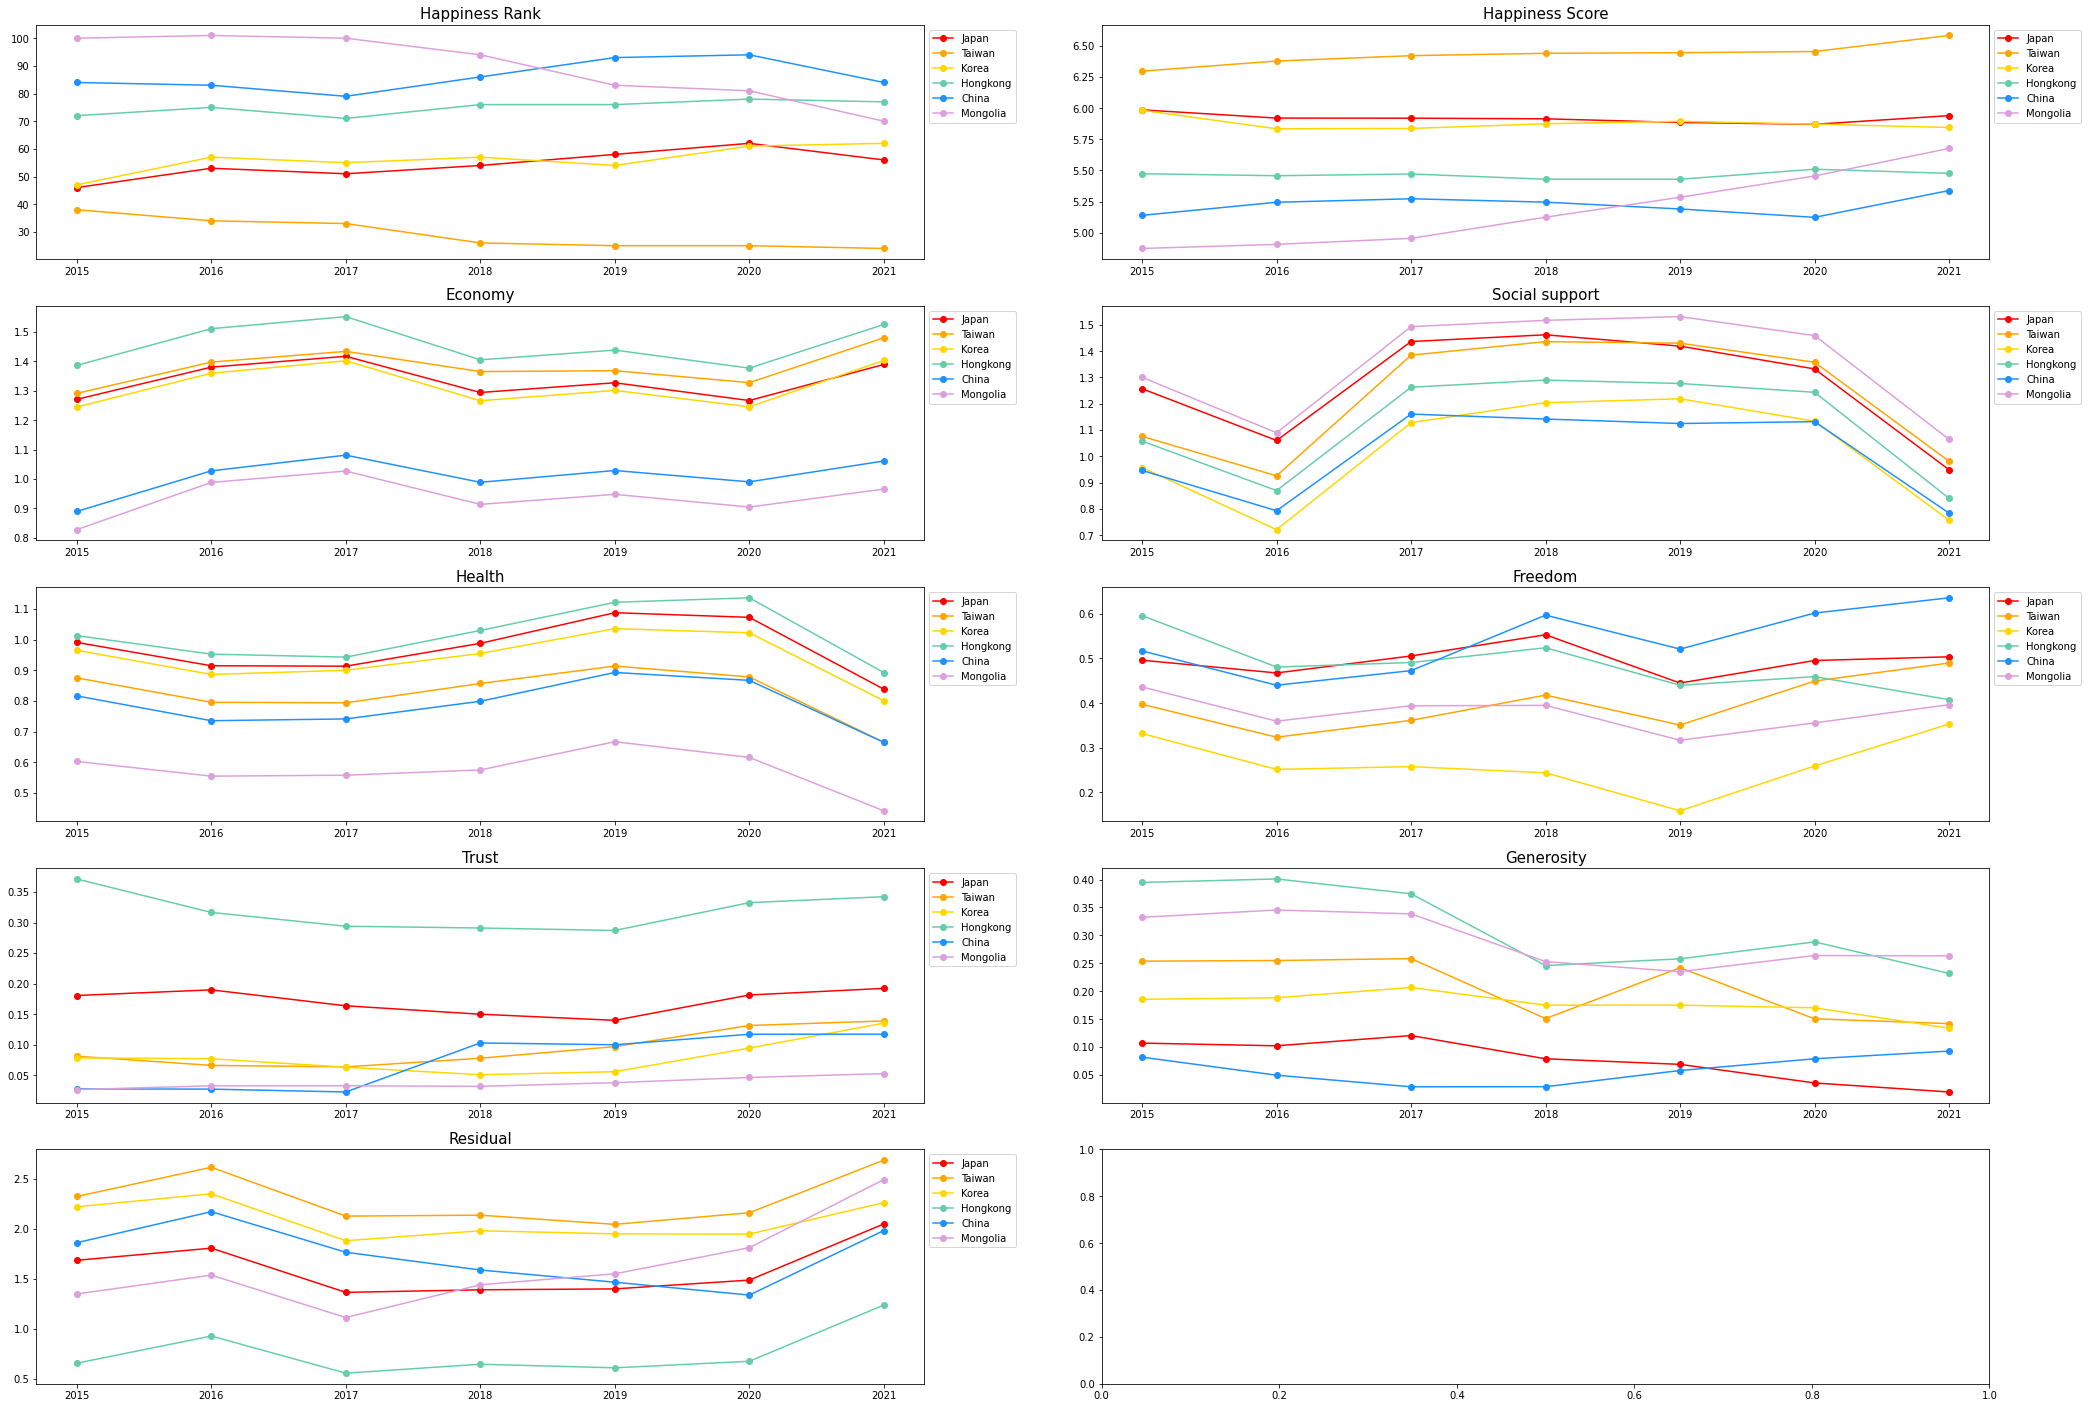

In [ ]:
# eastern asia 국가별 각 feature 비교
f, axes = plt.subplots(5,2, figsize=(35,25))

plt.subplot(5, 2, 1)
plt.plot(japan.Year, japan.Happiness_Rank, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Happiness_Rank, marker='o', color='orange')
plt.plot(korea.Year, korea.Happiness_Rank, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Happiness_Rank, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Happiness_Rank, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Happiness_Rank, marker='o', color='plum')
plt.title('Happiness Rank', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 2)
plt.plot(japan.Year, japan.Happiness_Score, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Happiness_Score, marker='o', color='orange')
plt.plot(korea.Year, korea.Happiness_Score, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Happiness_Score, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Happiness_Score, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Happiness_Score, marker='o', color='plum')
plt.title('Happiness Score', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 3)
plt.plot(japan.Year, japan.Economy, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Economy, marker='o', color='orange')
plt.plot(korea.Year, korea.Economy, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Economy, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Economy, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Economy, marker='o', color='plum')
plt.title('Economy', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 4)
plt.plot(japan.Year, japan.Social_support, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Social_support, marker='o', color='orange')
plt.plot(korea.Year, korea.Social_support, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Social_support, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Social_support, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Social_support, marker='o', color='plum')
plt.title('Social support', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 5)
plt.plot(japan.Year, japan.Health, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Health, marker='o', color='orange')
plt.plot(korea.Year, korea.Health, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Health, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Health, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Health, marker='o', color='plum')
plt.title('Health', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 6)
plt.plot(japan.Year, japan.Freedom, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Freedom, marker='o', color='orange')
plt.plot(korea.Year, korea.Freedom, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Freedom, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Freedom, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Freedom, marker='o', color='plum')
plt.title('Freedom', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 7)
plt.plot(japan.Year, japan.Trust, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Trust, marker='o', color='orange')
plt.plot(korea.Year, korea.Trust, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Trust, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Trust, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Trust, marker='o', color='plum')
plt.title('Trust', fontsize=15)
plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

plt.subplot(5, 2, 8)
plt.plot(japan.Year, japan.Generosity, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Generosity, marker='o', color='orange')
plt.plot(korea.Year, korea.Generosity, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Generosity, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Generosity, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Generosity, marker='o', color='plum')
plt.title('Generosity', fontsize=15)

plt.subplot(5,2,9)
plt.plot(japan.Year, japan.Dystopia_Residual, marker='o', color='red')
plt.plot(taiwan.Year, taiwan.Dystopia_Residual, marker='o', color='orange')
plt.plot(korea.Year, korea.Dystopia_Residual, marker='o', color='gold')
plt.plot(hongkong.Year, hongkong.Dystopia_Residual, marker='o', color='mediumaquamarine')
plt.plot(china.Year, china.Dystopia_Residual, marker='o', color='dodgerblue')
plt.plot(mongolia.Year, mongolia.Dystopia_Residual, marker='o', color='plum')
plt.title('Residual', fontsize=15)


plt.legend(["Japan", "Taiwan", "Korea", "Hongkong", "China", "Mongolia"], fontsize=10, bbox_to_anchor = (1,1))

In [ ]:
mean_japan = mean[mean['Country'] == 'Japan']
mean_japan # Japan의 index는 55

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
55,Japan,54.285714,5.920043,1.334941,1.273798,0.972407,0.495231,0.171128,0.07616,1.596384,2018.0,Eastern Asia


In [ ]:
# 일본과 비슷한 순위의 10개국 선정
compare = mean[50:61]
compare

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
50,Poland,47.428571,6.036629,1.217628,1.278573,0.767223,0.521248,0.080152,0.119898,2.051825,2018.0,Central and Eastern Europe
51,Nicaragua,47.857143,6.035171,0.671415,1.163335,0.712927,0.506109,0.155960,0.242741,2.582798,2018.0,Latin America and Caribbean
52,Lithuania,48.428571,6.017129,1.244191,1.333567,0.706897,0.310675,0.034606,0.033610,2.353491,2018.0,Central and Eastern Europe
53,Belize,50.333333,5.956000,0.863712,0.956323,0.459961,0.550940,0.097764,0.219952,2.807115,2017.0,Latin America and Caribbean
54,Ecuador,52.142857,5.949886,0.918251,1.116332,0.749342,0.501879,0.122416,0.118366,2.423457,2018.0,Latin America and Caribbean
55,Japan,54.285714,5.920043,1.334941,1.273798,0.972407,0.495231,0.171128,0.076160,1.596384,2018.0,Eastern Asia
56,Kazakhstan,54.714286,5.914529,1.186388,1.291759,0.629861,0.470489,0.110592,0.151533,2.073822,2018.0,Central and Eastern Europe
57,South Korea,56.142857,5.877843,1.317276,1.017507,0.938035,0.265321,0.079425,0.176352,2.083964,2018.0,Eastern Asia
58,Cyprus,56.428571,5.863786,1.280602,1.008571,0.913541,0.401320,0.048982,0.236410,1.974258,2018.0,Western Europe
59,Romania,58.142857,5.822243,1.157698,1.034497,0.723987,0.466201,0.003597,0.097697,2.338613,2018.0,Central and Eastern Europe


In [ ]:
compare

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
50,Poland,47.428571,6.036629,1.217628,1.278573,0.767223,0.521248,0.080152,0.119898,2.051825,2018.0,Central and Eastern Europe
51,Nicaragua,47.857143,6.035171,0.671415,1.163335,0.712927,0.506109,0.155960,0.242741,2.582798,2018.0,Latin America and Caribbean
52,Lithuania,48.428571,6.017129,1.244191,1.333567,0.706897,0.310675,0.034606,0.033610,2.353491,2018.0,Central and Eastern Europe
53,Belize,50.333333,5.956000,0.863712,0.956323,0.459961,0.550940,0.097764,0.219952,2.807115,2017.0,Latin America and Caribbean
54,Ecuador,52.142857,5.949886,0.918251,1.116332,0.749342,0.501879,0.122416,0.118366,2.423457,2018.0,Latin America and Caribbean
55,Japan,54.285714,5.920043,1.334941,1.273798,0.972407,0.495231,0.171128,0.076160,1.596384,2018.0,Eastern Asia
56,Kazakhstan,54.714286,5.914529,1.186388,1.291759,0.629861,0.470489,0.110592,0.151533,2.073822,2018.0,Central and Eastern Europe
57,South Korea,56.142857,5.877843,1.317276,1.017507,0.938035,0.265321,0.079425,0.176352,2.083964,2018.0,Eastern Asia
58,Cyprus,56.428571,5.863786,1.280602,1.008571,0.913541,0.401320,0.048982,0.236410,1.974258,2018.0,Western Europe
59,Romania,58.142857,5.822243,1.157698,1.034497,0.723987,0.466201,0.003597,0.097697,2.338613,2018.0,Central and Eastern Europe


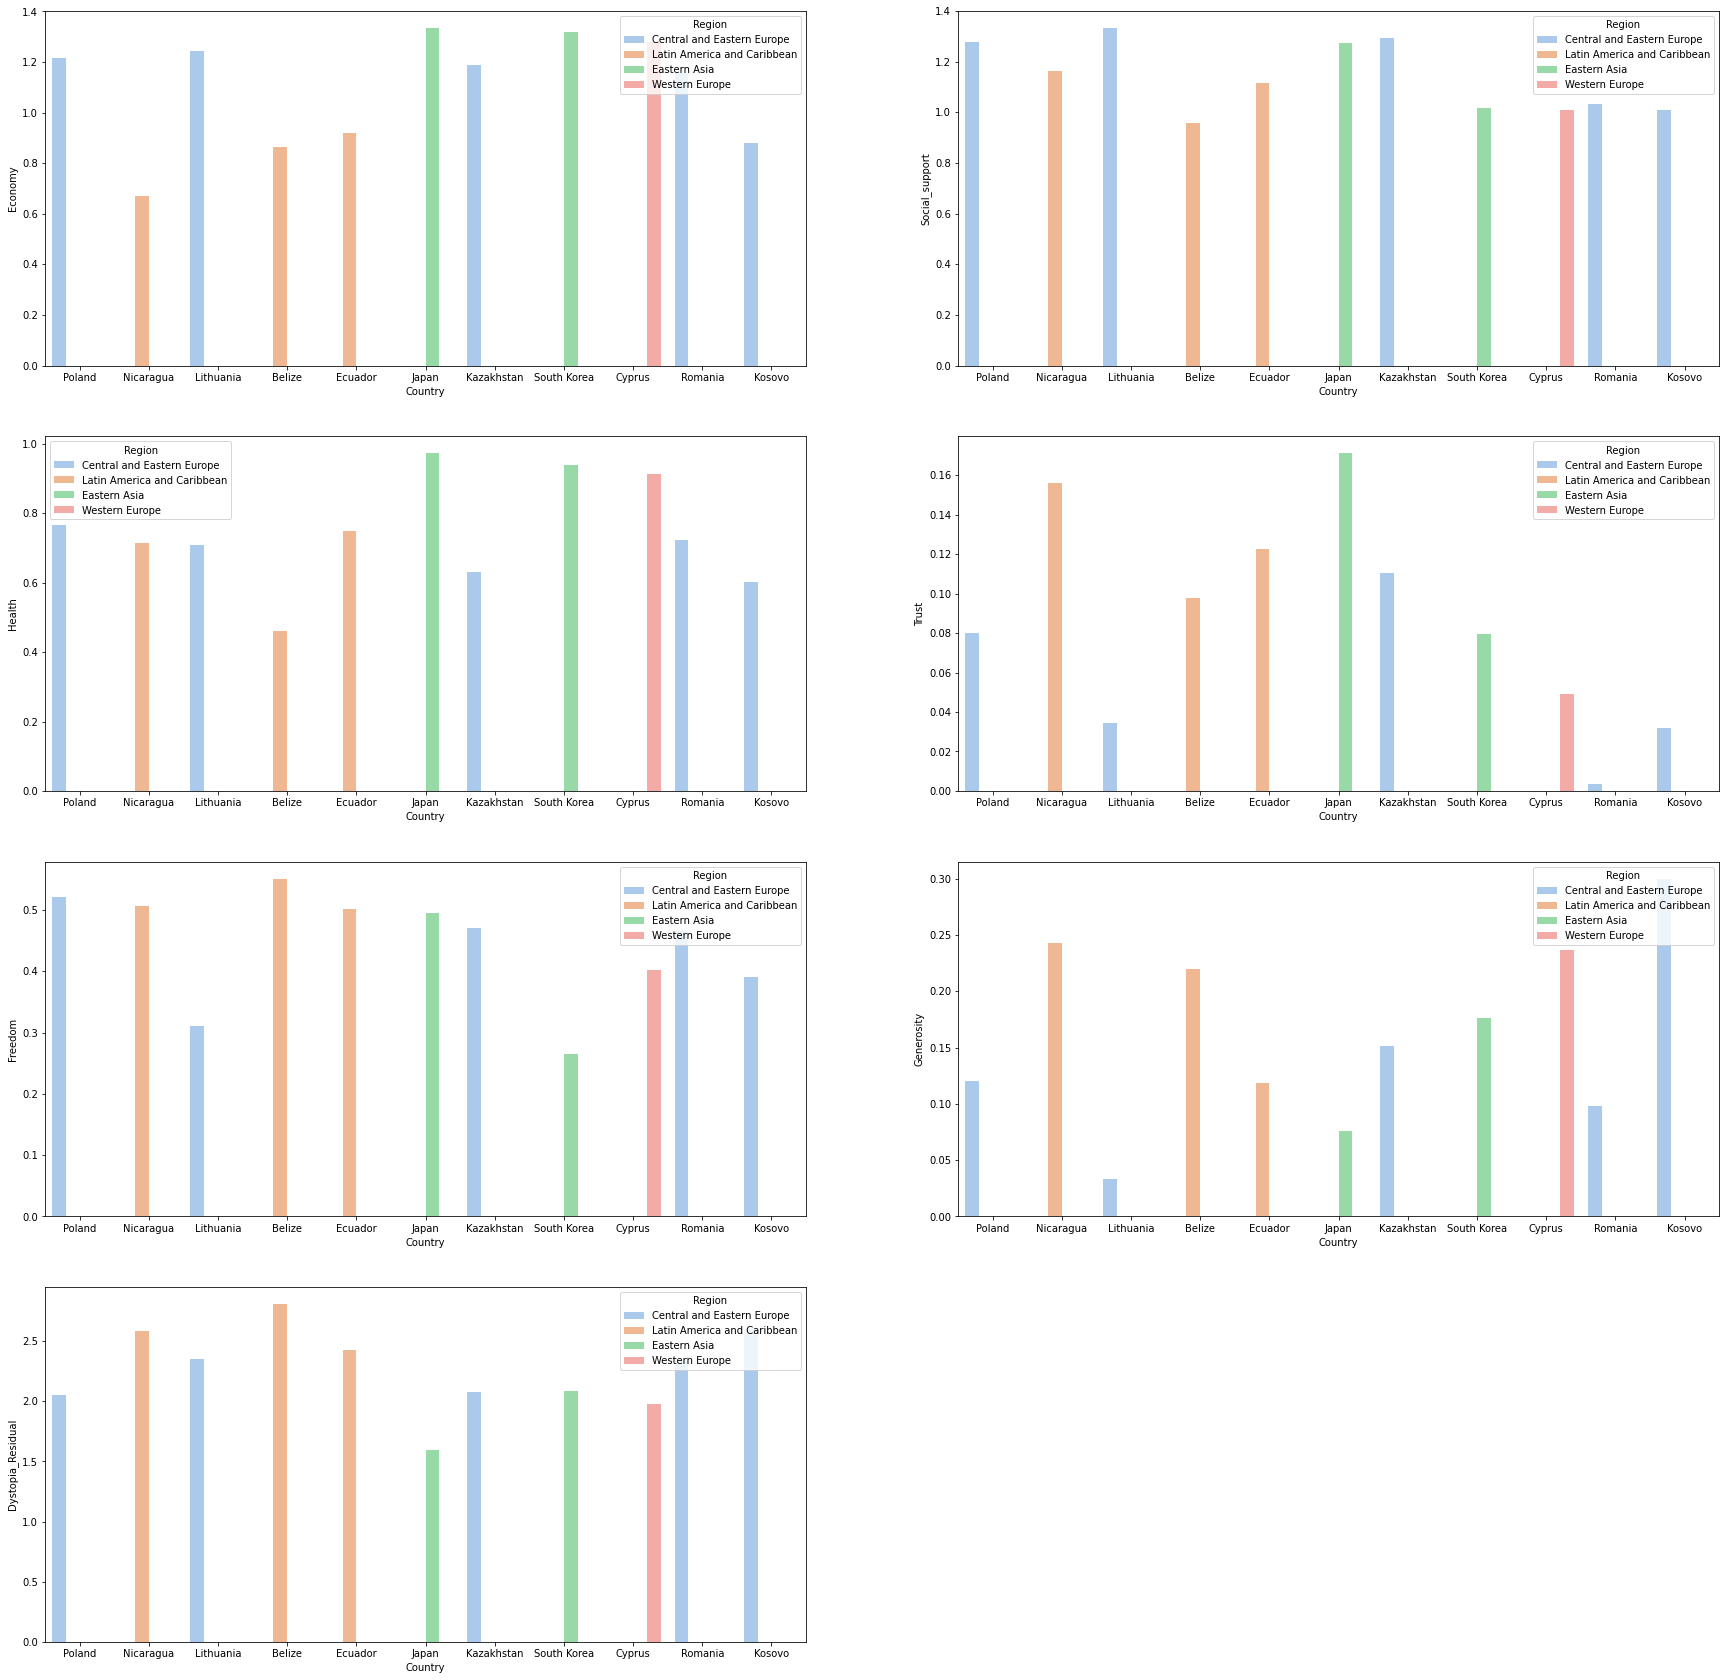

In [ ]:
# 일본과 비슷한 순위의 10개국의 각 feature 비교

plt.figure(figsize=(30,30))

sns.set_palette("pastel")
plt.subplot(4,2,1)
sns.barplot(x=compare.Country, y=compare.Economy, data=compare, hue=compare.Region)
# plt.xticks(rotation= 90)
plt.subplot(4,2,2)
sns.barplot(x=compare.Country, y=compare.Social_support, data=compare, hue=compare.Region)
plt.subplot(4,2,3)
sns.barplot(x=compare.Country, y=compare.Health, data=compare, hue=compare.Region)
plt.subplot(4,2,4)
sns.barplot(x=compare.Country, y=compare.Trust, data=compare, hue=compare.Region)
plt.subplot(4,2,5)
sns.barplot(x=compare.Country, y=compare.Freedom, data=compare, hue=compare.Region)
plt.subplot(4,2,6)
sns.barplot(x=compare.Country, y=compare.Generosity, data=compare, hue=compare.Region)
plt.subplot(4,2,7)
sns.barplot(x=compare.Country, y=compare.Dystopia_Residual, data=compare, hue=compare.Region)
plt.show()

- Japan은 순위가 비슷한 다른 나라들에 비해 Economy, Social support, Health, Trust는 높지만 Generosity와 Residual은 낮다.
- 특히 Residual은 다른 나라와 비교했을 때 가장 낮다.

In [ ]:
# 비교그룹 생성
df_compare = new_concat[(new_concat.Country == "Poland") |
                     (new_concat.Country == "Nicaragua") | 
                     (new_concat.Country == "Lithuania") | 
                     (new_concat.Country == "Belize") | 
                     (new_concat.Country == "Ecuador") | 
                     (new_concat.Country == "Kazakstan") | 
                     (new_concat.Country == "South Korea") | 
                     (new_concat.Country == "Cyprus") | 
                     (new_concat.Country == "Romania") | 
                     (new_concat.Country == "Kosovo")]
df_compare

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
46,South Korea,Eastern Asia,47,5.9840,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780,2015
47,Ecuador,Latin America and Caribbean,48,5.9750,0.864020,0.999030,0.790750,0.485740,0.180900,0.115410,2.539420,2015
55,Lithuania,Central and Eastern Europe,56,5.8330,1.147230,1.257450,0.731280,0.213420,0.010310,0.026410,2.446490,2015
56,Nicaragua,Latin America and Caribbean,57,5.8280,0.593250,1.141840,0.743140,0.554750,0.193170,0.278150,2.324070,2015
59,Poland,Central and Eastern Europe,60,5.7910,1.125550,1.279480,0.779030,0.531220,0.042120,0.167590,1.865650,2015
66,Cyprus,Western Europe,67,5.6890,1.208130,0.893180,0.923560,0.406720,0.061460,0.306380,1.889310,2015
68,Kosovo,Central and Eastern Europe,69,5.5890,0.801480,0.811980,0.631320,0.247490,0.047410,0.283100,2.765790,2015
85,Romania,Central and Eastern Europe,86,5.1240,1.043450,0.885880,0.768900,0.350680,0.006490,0.137480,1.931290,2015
47,Nicaragua,Latin America and Caribbean,48,5.9920,0.693840,0.895210,0.652130,0.465820,0.162920,0.297730,2.824280,2016
50,Ecuador,Latin America and Caribbean,51,5.9760,0.973060,0.859740,0.686130,0.402700,0.180370,0.100740,2.773660,2016


In [ ]:
# Year을 기준으로 grouping 후 비교그룹의 평균값 구하기
df_compare_mean = df_compare.groupby('Year').mean()
df_compare_mean.reset_index(level="Year", inplace=True)
df_compare_mean

,Year,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,2015,5.726625,1.003465,1.028323,0.791670,0.390263,0.077554,0.187511,2.247725
1,2016,5.764667,1.089701,0.818891,0.675838,0.342206,0.080656,0.186233,2.571208
2,2017,5.830333,1.131028,1.235735,0.676543,0.392795,0.067217,0.199090,2.127934
3,2018,5.932111,1.022556,1.285444,0.730556,0.468333,0.057444,0.153111,2.214667
4,2019,6.071875,1.082250,1.312000,0.883250,0.402875,0.051750,0.149500,2.190250
5,2020,6.118050,1.031899,1.237030,0.852383,0.488074,0.082240,0.154581,2.271838
6,2021,6.092325,1.159914,0.864995,0.650392,0.515159,0.081362,0.144608,2.675910


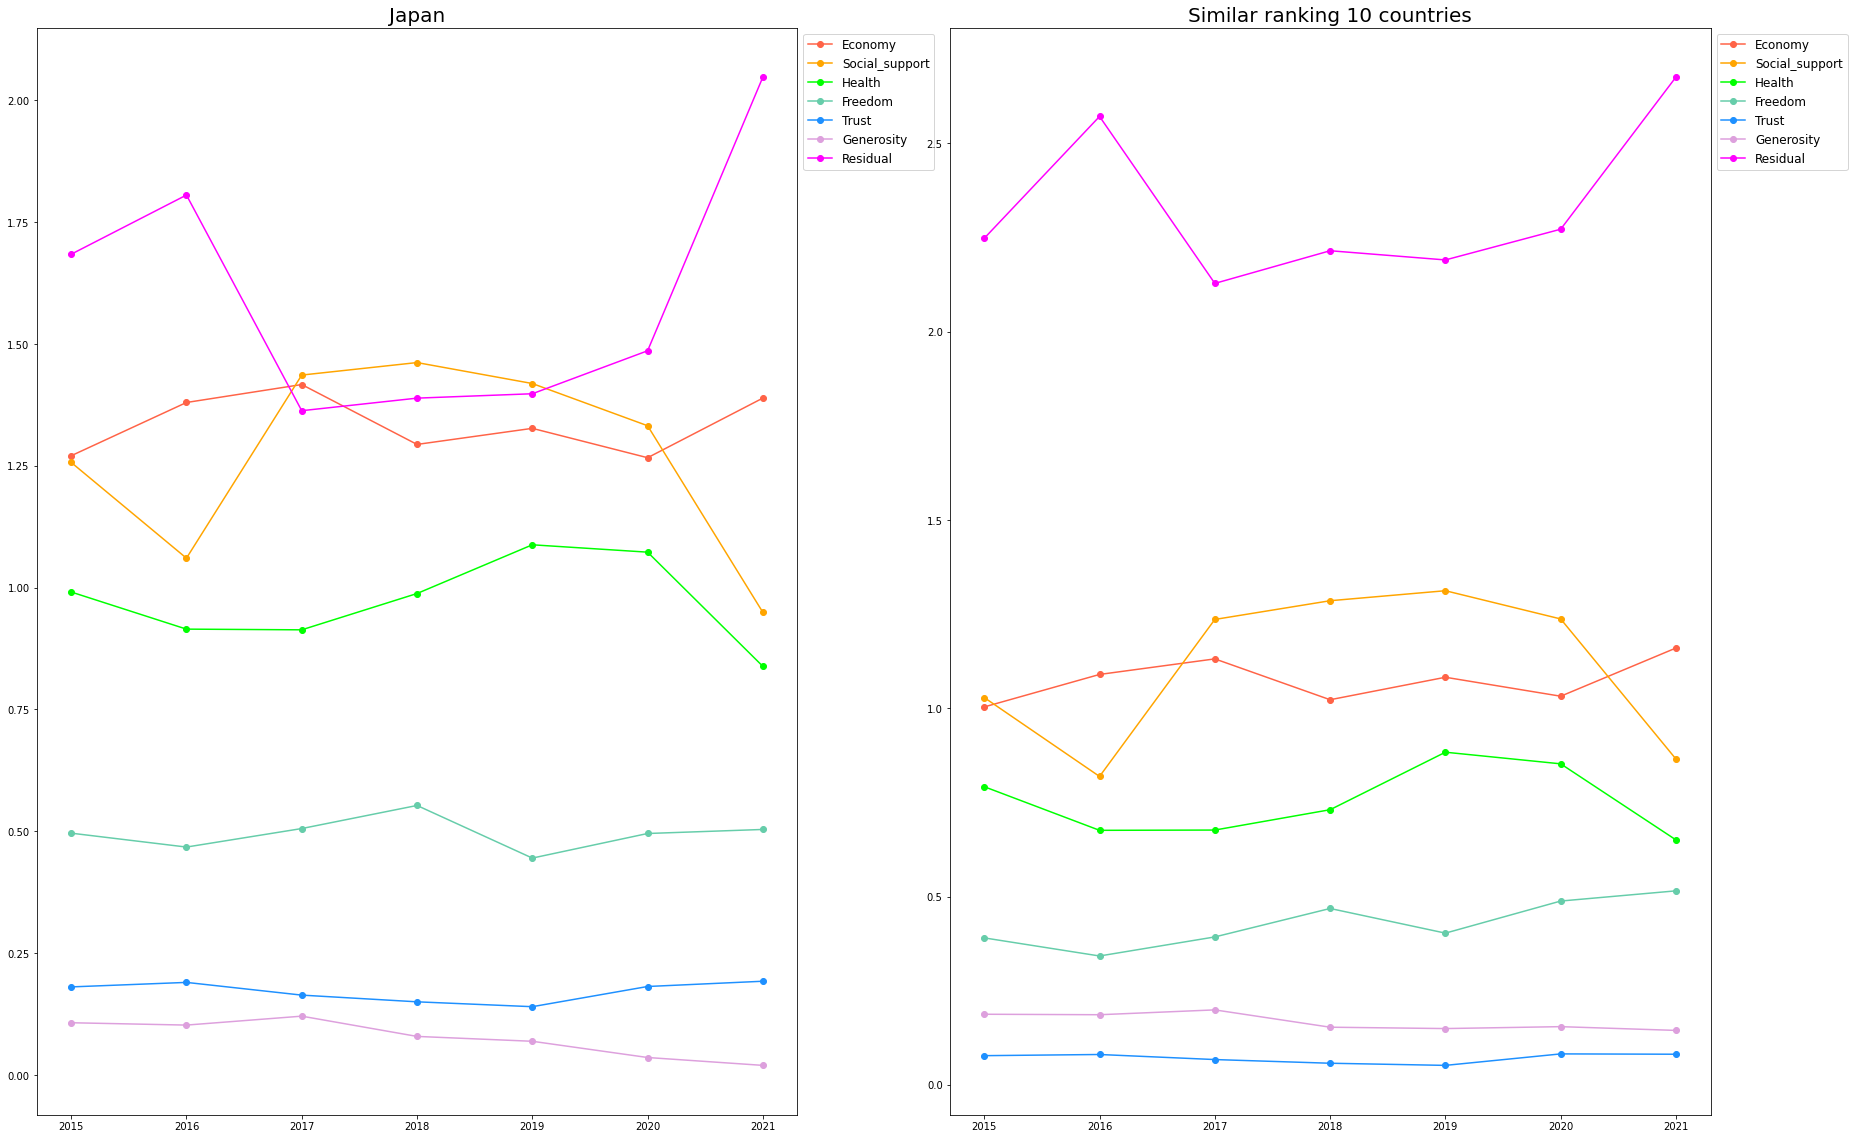

In [ ]:
# 일본과 비슷한 순위의 10개 국가의 각 feature별 변동성 비교
f, axes = plt.subplots(1, 2, figsize=(30,20))

plt.subplot(1, 2, 1)

plt.plot(japan.Year, japan.Economy, marker='o', color='tomato')
plt.plot(japan.Year, japan.Social_support, marker='o', color='orange')
plt.plot(japan.Year, japan.Health, marker='o', color='lime')
plt.plot(japan.Year, japan.Freedom, marker='o', color='mediumaquamarine')
plt.plot(japan.Year, japan.Trust, marker='o', color='dodgerblue')
plt.plot(japan.Year, japan.Generosity, marker='o', color='plum')
plt.plot(japan.Year, japan.Dystopia_Residual, marker='o', color='magenta')
plt.title('Japan', fontsize=20)
plt.legend(["Economy", "Social_support", "Health", "Freedom", "Trust", "Generosity", "Residual"], fontsize=12, bbox_to_anchor = (1,1))

plt.subplot(1, 2, 2)
plt.plot(df_compare_mean.Year, df_compare_mean.Economy, marker='o', color='tomato')
plt.plot(df_compare_mean.Year, df_compare_mean.Social_support, marker='o', color='orange')
plt.plot(df_compare_mean.Year, df_compare_mean.Health, marker='o', color='lime')
plt.plot(df_compare_mean.Year, df_compare_mean.Freedom, marker='o', color='mediumaquamarine')
plt.plot(df_compare_mean.Year, df_compare_mean.Trust, marker='o', color='dodgerblue')
plt.plot(df_compare_mean.Year, df_compare_mean.Generosity, marker='o', color='plum')
plt.plot(df_compare_mean.Year, df_compare_mean.Dystopia_Residual, marker='o', color='magenta')
plt.title('Similar ranking 10 countries', fontsize=20)
plt.legend(["Economy", "Social_support", "Health", "Freedom", "Trust", "Generosity", "Residual"], fontsize=12, bbox_to_anchor = (1,1))

- Residual의 가중치가 가장 높다. --> 6 factor로 설명 불가한 요인이 있을 것
- Japan의 각 Feature의 가중치 순서는 랭킹이 비슷한 국가들과 비슷함
- Trust와 Generosity의 순서만 다름

Country를 기준으로 grouping 후 평균값 구하기

In [ ]:
mean = new_concat.groupby(['Country']).mean().sort_values(by=['Happiness_Score'],ascending=False).reset_index()
mean

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Finland,2.857143,7.619971,1.359478,1.396838,0.867325,0.637225,0.421536,0.196112,2.741563,2018.0
1,Denmark,2.142857,7.570729,1.401734,1.407128,0.866920,0.640142,0.446732,0.292113,2.515882,2018.0
2,Switzerland,3.428571,7.526914,1.473928,1.376933,0.928363,0.626522,0.388540,0.265751,2.466877,2018.0
3,Iceland,3.428571,7.516200,1.391615,1.454844,0.908841,0.635694,0.145030,0.392925,2.587247,2018.0
4,Norway,3.571429,7.512214,1.509224,1.394091,0.879501,0.651940,0.368670,0.311694,2.397079,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
167,Syria,152.600000,3.292200,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.998409,2017.0
168,Burundi,149.857143,3.277943,0.044605,0.402876,0.215467,0.154234,0.137019,0.184201,2.139337,2018.0
169,South Sudan,150.400000,3.269320,0.344654,0.504558,0.200421,0.106258,0.111020,0.236119,1.766322,2018.0
170,Afghanistan,149.857143,3.236257,0.350913,0.343600,0.238004,0.084231,0.043038,0.227932,1.948408,2018.0


# Region별 행복지수: 지도로 표현

In [ ]:
# 타원형
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = mean['Country'],
           locationmode = 'country names',
           z = mean['Freedom'], 
           text = mean['Country'],
           colorbar = {'title':'Freedom'},
            colorscale = 'sunset')

layout = dict(title = 'Happiness Score',
              geo = dict(showframe = True,showcoastlines = True, projection =  dict(type = 'hammer')))

globe = go.Figure(data = [data], layout=layout)
iplot(globe)

In [ ]:
# 직사각형
data = dict(type = 'choropleth', 
           locations = mean['Country'],
           locationmode = 'country names',
           z = mean['Happiness_Score'], 
           text = mean['Country'],
           colorbar = {'title':'Happiness Score'},
            colorscale = 'sunset')

layout = dict(title = 'Happiness Score',
              geo = dict(showframe = True,showcoastlines = True, projection = {'type': 'mercator'}))

globe = go.Figure(data = [data], layout=layout)
iplot(globe)

# mean data에 Region 컬럼 생성

In [ ]:
mean.head(30)
# Region 컬럼이 없는 것을 확인

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Finland,2.857143,7.619971,1.359478,1.396838,0.867325,0.637225,0.421536,0.196112,2.741563,2018.000000
1,Denmark,2.142857,7.570729,1.401734,1.407128,0.866920,0.640142,0.446732,0.292113,2.515882,2018.000000
2,Switzerland,3.428571,7.526914,1.473928,1.376933,0.928363,0.626522,0.388540,0.265751,2.466877,2018.000000
3,Iceland,3.428571,7.516200,1.391615,1.454844,0.908841,0.635694,0.145030,0.392925,2.587247,2018.000000
4,Norway,3.571429,7.512214,1.509224,1.394091,0.879501,0.651940,0.368670,0.311694,2.397079,2018.000000
5,Netherlands,6.000000,7.419414,1.413583,1.327289,0.874564,0.601209,0.320739,0.387781,2.494276,2018.000000
6,Sweden,8.142857,7.330314,1.402938,1.333973,0.892042,0.631872,0.411026,0.314230,2.344209,2018.000000
7,New Zealand,8.285714,7.305886,1.318562,1.397109,0.893021,0.628729,0.415184,0.395044,2.258307,2018.000000
8,Canada,8.428571,7.298343,1.384139,1.345259,0.903257,0.621041,0.316503,0.353678,2.374511,2018.000000
9,Australia,10.428571,7.255329,1.391187,1.371151,0.913703,0.613476,0.317977,0.385250,2.262547,2018.000000


Region 컬럼 생성

In [ ]:
# 나라:지역 dictionary 생성
tmp_1 = new_2015[['Country','Region']] 
tmp_2 = new_2016[['Country','Region']]
tmp = pd.concat([tmp_1,tmp_2]).drop_duplicates() # 15년도와 16년도의 있는 나라와 지역이 서로 다르다
tmp.set_index('Country', inplace=True)
country_region = tmp.to_dict()

def match_region(df, tmp):
  for idx, cntry in enumerate(df['Country']):
    if cntry in tmp.index: # if the country is in the country_region dictionary
      df['Region'][idx] = country_region['Region'][cntry]
    else:
      df['Region'][idx] = np.nan #If the country is not in the dictionary, input NAN 

In [ ]:
country_region

{'Region': {'Afghanistan': 'Southern Asia',
  'Albania': 'Central and Eastern Europe',
  'Algeria': 'Middle East and Northern Africa',
  'Angola': 'Sub-Saharan Africa',
  'Argentina': 'Latin America and Caribbean',
  'Armenia': 'Central and Eastern Europe',
  'Australia': 'Australia and New Zealand',
  'Austria': 'Western Europe',
  'Azerbaijan': 'Central and Eastern Europe',
  'Bahrain': 'Middle East and Northern Africa',
  'Bangladesh': 'Southern Asia',
  'Belarus': 'Central and Eastern Europe',
  'Belgium': 'Western Europe',
  'Belize': 'Latin America and Caribbean',
  'Benin': 'Sub-Saharan Africa',
  'Bhutan': 'Southern Asia',
  'Bolivia': 'Latin America and Caribbean',
  'Bosnia and Herzegovina': 'Central and Eastern Europe',
  'Botswana': 'Sub-Saharan Africa',
  'Brazil': 'Latin America and Caribbean',
  'Bulgaria': 'Central and Eastern Europe',
  'Burkina Faso': 'Sub-Saharan Africa',
  'Burundi': 'Sub-Saharan Africa',
  'Cambodia': 'Southeastern Asia',
  'Cameroon': 'Sub-Saharan

In [ ]:
# meand data에 Region 컬럼 생성
mean['Region'] = np.nan 

In [ ]:
# meand data의 Region 컬럼에 region 추가
match_region(mean, tmp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
mean.head(30)
# Region 컬럼이 제대로 생성되었음을 확인

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
0,Finland,2.857143,7.619971,1.359478,1.396838,0.867325,0.637225,0.421536,0.196112,2.741563,2018.000000,Western Europe
1,Denmark,2.142857,7.570729,1.401734,1.407128,0.866920,0.640142,0.446732,0.292113,2.515882,2018.000000,Western Europe
2,Switzerland,3.428571,7.526914,1.473928,1.376933,0.928363,0.626522,0.388540,0.265751,2.466877,2018.000000,Western Europe
3,Iceland,3.428571,7.516200,1.391615,1.454844,0.908841,0.635694,0.145030,0.392925,2.587247,2018.000000,Western Europe
4,Norway,3.571429,7.512214,1.509224,1.394091,0.879501,0.651940,0.368670,0.311694,2.397079,2018.000000,Western Europe
5,Netherlands,6.000000,7.419414,1.413583,1.327289,0.874564,0.601209,0.320739,0.387781,2.494276,2018.000000,Western Europe
6,Sweden,8.142857,7.330314,1.402938,1.333973,0.892042,0.631872,0.411026,0.314230,2.344209,2018.000000,Western Europe
7,New Zealand,8.285714,7.305886,1.318562,1.397109,0.893021,0.628729,0.415184,0.395044,2.258307,2018.000000,Australia and New Zealand
8,Canada,8.428571,7.298343,1.384139,1.345259,0.903257,0.621041,0.316503,0.353678,2.374511,2018.000000,North America
9,Australia,10.428571,7.255329,1.391187,1.371151,0.913703,0.613476,0.317977,0.385250,2.262547,2018.000000,Australia and New Zealand


# 행복지수 상위 30개국, 하위 30개국 선정

In [ ]:
top30 = mean.head(30)
bottom30 = mean.tail(30)

In [ ]:
top30

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
0,Finland,2.857143,7.619971,1.359478,1.396838,0.867325,0.637225,0.421536,0.196112,2.741563,2018.000000,Western Europe
1,Denmark,2.142857,7.570729,1.401734,1.407128,0.866920,0.640142,0.446732,0.292113,2.515882,2018.000000,Western Europe
2,Switzerland,3.428571,7.526914,1.473928,1.376933,0.928363,0.626522,0.388540,0.265751,2.466877,2018.000000,Western Europe
3,Iceland,3.428571,7.516200,1.391615,1.454844,0.908841,0.635694,0.145030,0.392925,2.587247,2018.000000,Western Europe
4,Norway,3.571429,7.512214,1.509224,1.394091,0.879501,0.651940,0.368670,0.311694,2.397079,2018.000000,Western Europe
5,Netherlands,6.000000,7.419414,1.413583,1.327289,0.874564,0.601209,0.320739,0.387781,2.494276,2018.000000,Western Europe
6,Sweden,8.142857,7.330314,1.402938,1.333973,0.892042,0.631872,0.411026,0.314230,2.344209,2018.000000,Western Europe
7,New Zealand,8.285714,7.305886,1.318562,1.397109,0.893021,0.628729,0.415184,0.395044,2.258307,2018.000000,Australia and New Zealand
8,Canada,8.428571,7.298343,1.384139,1.345259,0.903257,0.621041,0.316503,0.353678,2.374511,2018.000000,North America
9,Australia,10.428571,7.255329,1.391187,1.371151,0.913703,0.613476,0.317977,0.385250,2.262547,2018.000000,Australia and New Zealand


In [ ]:
bottom30

,Country,Happiness_Rank,Happiness_Score,Economy,Social_support,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year,Region
142,Mali,125.285714,4.363971,0.363501,1.011593,0.191942,0.346584,0.086686,0.172588,2.191089,2018.000000,Sub-Saharan Africa
143,Niger,124.000000,4.358100,0.128981,0.731145,0.268571,0.411528,0.137524,0.200490,2.479956,2018.000000,Sub-Saharan Africa
144,Congo (Kinshasa),126.833333,4.340500,0.062367,1.021840,0.219280,0.260609,0.063951,0.235450,2.477030,2017.500000,Sub-Saharan Africa
145,Mauritania,126.857143,4.339571,0.578456,1.036660,0.344303,0.152046,0.132471,0.162170,1.933499,2018.000000,Sub-Saharan Africa
146,Egypt,126.857143,4.330014,0.921846,0.848019,0.554026,0.288071,0.091887,0.096368,1.529734,2018.000000,Middle East and Northern Africa
147,Burkina Faso,127.428571,4.281643,0.320011,0.868634,0.260795,0.331862,0.123351,0.204658,2.172362,2018.000000,Sub-Saharan Africa
148,Benin,124.857143,4.252314,0.393876,0.301881,0.271534,0.422855,0.094351,0.184705,2.583048,2018.000000,Sub-Saharan Africa
149,Sudan,129.500000,4.241750,0.604069,1.071832,0.317323,0.032951,0.104709,0.171927,1.938896,2016.500000,Sub-Saharan Africa
150,Guinea,130.285714,4.171657,0.310996,0.619682,0.249690,0.359588,0.107749,0.248822,2.275104,2018.000000,Sub-Saharan Africa
151,Uganda,133.571429,4.167071,0.324295,1.014505,0.292986,0.420381,0.061833,0.275800,1.777339,2018.000000,Sub-Saharan Africa


# 상위 30개국, 하위 30개국의 분포도

In [ ]:
labels = top30.Region.value_counts().index
labels

Index(['Western Europe', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'Australia and New Zealand',
       'North America', 'Central and Eastern Europe', 'Southeastern Asia'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Top 30 Happiest Countries')

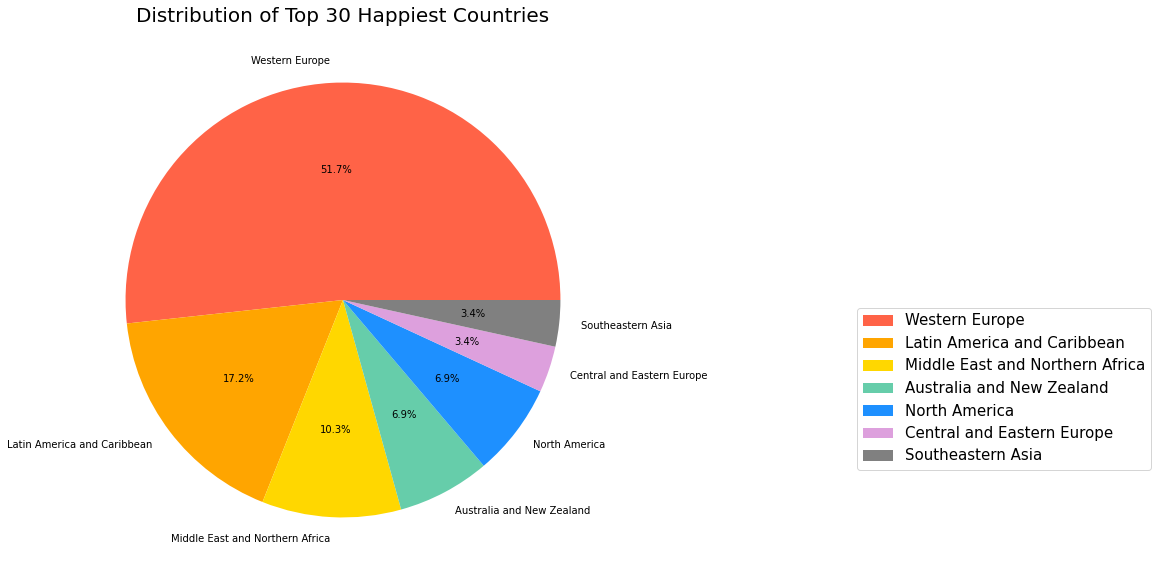

In [ ]:
labels = top30.Region.value_counts().index
# 'Western Europe', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Central and Eastern Europe', 'Southeastern Asia'

colors = ['tomato', 'orange', 'gold', 'mediumaquamarine', 'dodgerblue', 'plum', 'grey']

explode = [0,0,0,0,0,0,0]

sizes = top30.Region.value_counts().values

plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.legend(labels, bbox_to_anchor=(2, 0.5), fontsize=15) # 범례
plt.title('Distribution of Top 30 Happiest Countries', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Bottom 30 Happiest Countries')

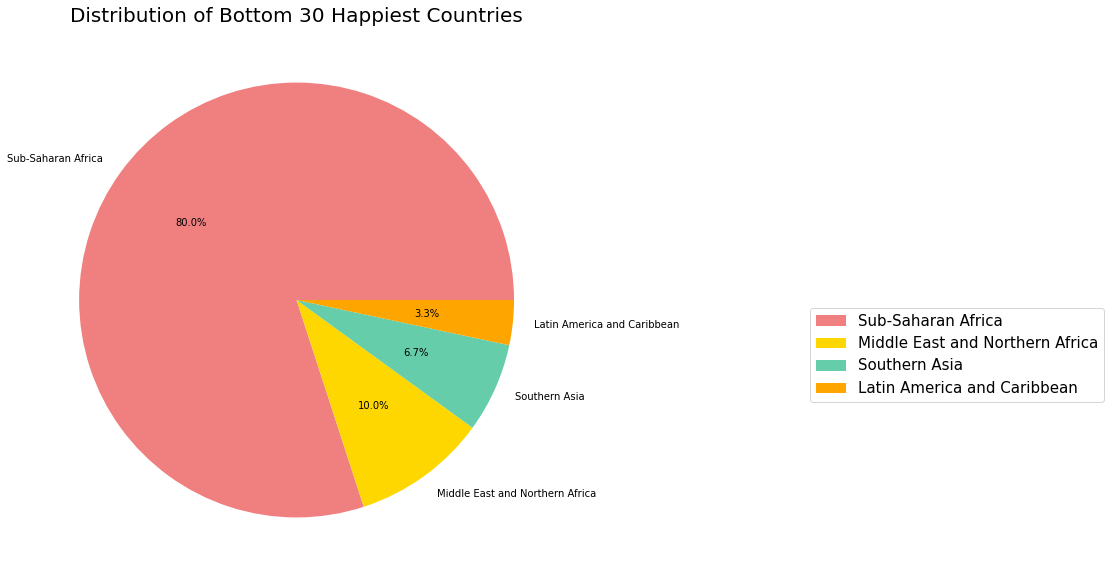

In [ ]:
labels = bottom30.Region.value_counts().index
# 'Sub-Saharan Africa', 'Middle East and Northern Africa', 'Southern Asia', 'Latin America and Caribbean'

colors = ['lightcoral', 'gold', 'mediumaquamarine', 'orange']

explode = [0,0,0,0]

sizes = bottom30.Region.value_counts().values

plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.legend(labels, bbox_to_anchor=(2, 0.5), fontsize=15) # 범례
plt.title('Distribution of Bottom 30 Happiest Countries', fontsize = 20)

# top30의 지수별 상관계수 vs bottom30의 지수별 상관계수

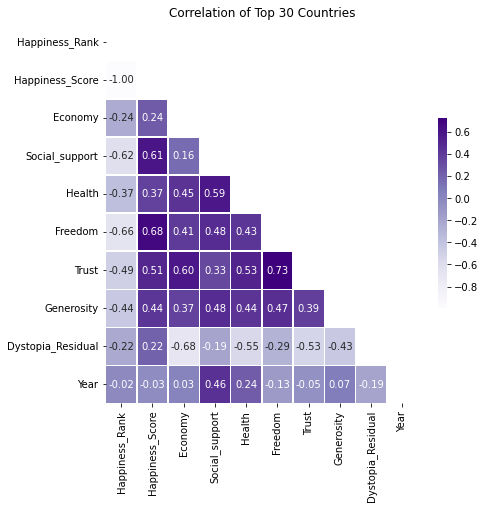

In [ ]:
# top30의 지수별 상관계수
plt.figure(figsize=(7,7))
plt.title('Correlation of Top 30 Countries')
mask=np.zeros_like(top30.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=top30.corr(),mask=mask,annot=True,fmt='.2f',linewidths=.5,cbar_kws={"shrink": .5},cmap='Purples');

plt.savefig('top30correlation.png')

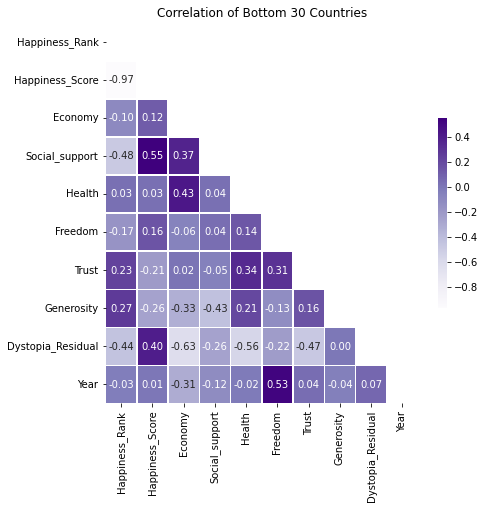

In [ ]:
# bottom30의 지수별 상관계수
plt.figure(figsize=(7,7))
plt.title('Correlation of Bottom 30 Countries')
mask=np.zeros_like(bottom30.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=bottom30.corr(),mask=mask,annot=True,fmt='.2f',linewidths=.5,cbar_kws={"shrink": .5},cmap='Purples');

plt.savefig('bottom30correlation.png')

# top30 mean vs bottom30 mean 각 feature 비교

In [ ]:
# top30의 mean 구하기
top30_economy = sum(top30.Economy)/30
top30_social_support = sum(top30.Social_support)/30
top30_health = sum(top30.Health)/30
top30_freedom = sum(top30.Freedom)/30
top30_trust = sum(top30.Trust)/30
top30_generosity = sum(top30.Generosity)/30
top30_residual = sum(top30.Dystopia_Residual)/30

In [ ]:
# bottom30의 mean 구하기
bottom30_economy = sum(bottom30.Economy)/30
bottom30_social_support = sum(bottom30.Social_support)/30
bottom30_health = sum(bottom30.Health)/30
bottom30_freedom = sum(bottom30.Freedom)/30
bottom30_trust = sum(bottom30.Trust)/30
bottom30_generosity = sum(bottom30.Generosity)/30
bottom30_residual = sum(bottom30.Dystopia_Residual)/30

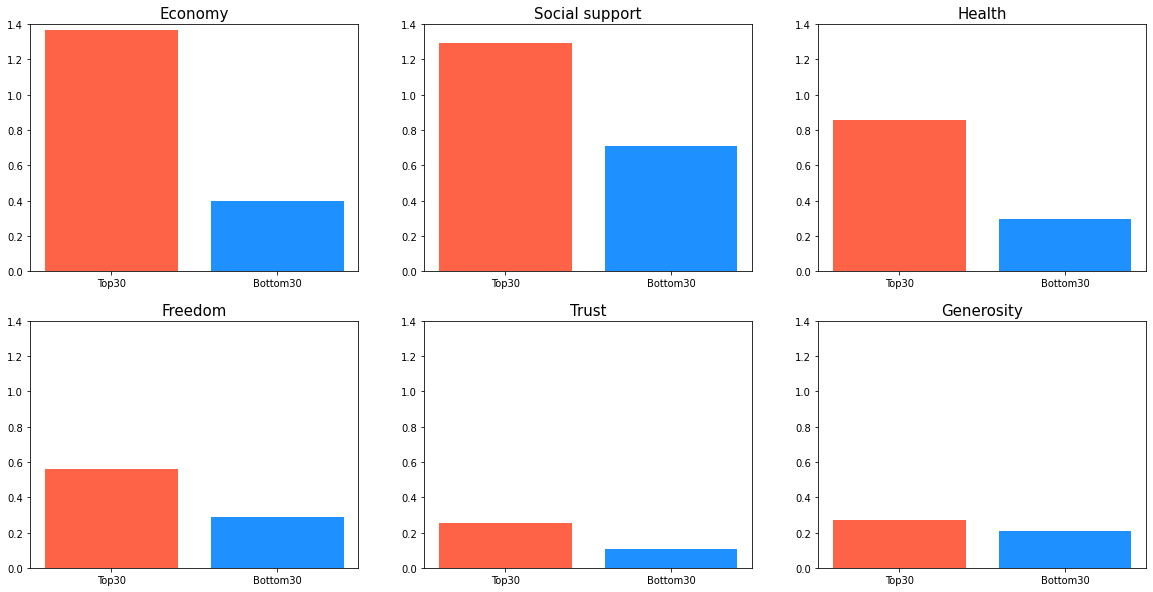

In [ ]:
# 각 feature 비교
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.bar(['Top30', 'Bottom30'], [top30_economy, bottom30_economy], color = ['tomato','dodgerblue'])
plt.title('Economy', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정
plt.subplot(2,3,2)
plt.bar(['Top30', 'Bottom30'], [top30_social_support, bottom30_social_support], color = ['tomato','dodgerblue'])
plt.title('Social support', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정
plt.subplot(2,3,3)
plt.bar(['Top30', 'Bottom30'], [top30_health, bottom30_health], color = ['tomato','dodgerblue'])
plt.title('Health', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정
plt.subplot(2,3,4)
plt.bar(['Top30', 'Bottom30'], [top30_freedom, bottom30_freedom], color = ['tomato','dodgerblue'])
plt.title('Freedom', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정
plt.subplot(2,3,5)
plt.bar(['Top30', 'Bottom30'], [top30_trust, bottom30_trust], color = ['tomato','dodgerblue'])
plt.title('Trust', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정
plt.subplot(2,3,6)
plt.bar(['Top30', 'Bottom30'], [top30_generosity, bottom30_generosity], color = ['tomato','dodgerblue'])
plt.title('Generosity', fontsize=15)
plt.ylim(0, 1.4) # y 축의 단위를 설정

plt.savefig('top30vsbottom30.png')